In [1]:
import twint
import asyncio
import nest_asyncio

In [2]:
nest_asyncio.apply()
c = twint.Config()
c.Search  = "ZackSnydersJusticeLeague"
c.Limit = 20000
c.Store_csv = True
c.Output = "C:/Users/vijayanandanand/OneDrive - Swinburne University/Drive/Vijay/Personal_Projects/Twitter_DataScrapping/data/TweetData.csv"
c.Lang = "en"
c.Since = "2021-03-18"
#c.Translate = True
#c.TranslateDest = "en"
twint.run.Search(c)


loop = asyncio.get_event_loop()
loop.is_running()
print("Tweet imported")

1373612526274015232 2021-03-21 23:28:41 +1100 <JeffKwakuM> WonderWoman is on VOLTS #ZackSnydersJusticeLeague
1373612512067878918 2021-03-21 23:28:38 +1100 <polokwane_SK> @sterkinekor did you watch the #ZackSnydersJusticeLeague ?
1373612483349463040 2021-03-21 23:28:31 +1100 <wonderprincess> $821. I honestly don't believe it. This is far beyond what I ever hoped for. Let's try to get to $1000! #ZackSnydersJusticeLeague #ForAutumn @afspnational  https://t.co/l3vJFKOGQT via @DonorDrive
1373612435572203520 2021-03-21 23:28:19 +1100 <BryanWeigel> I really enjoyed #ZackSnydersJusticeLeague  Wish it would have been 2 movies with a lead up to Flash &amp; Cyborg movies. Not a perfect movie, but worlds better than the original.
1373612395302690816 2021-03-21 23:28:10 +1100 <John_DM_Reviews> Lo peor de Joss Whedon #Snydercut  #ZackSnydersJusticeLeague  https://t.co/ID1ly1ylRR
1373612380630958084 2021-03-21 23:28:06 +1100 <SergiCabrera98> #ZackSnydersJusticeLeague menuda obra maestra, las 4 horas 

True

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from googletrans import Translator
from textblob import TextBlob
from wordcloud import WordCloud

In [3]:
df = pd.read_csv("C:/Users/vijayanandanand/OneDrive - Swinburne University/Drive/Vijay/Personal_Projects/Twitter_DataScrapping/data/TweetData.csv")

In [4]:
df['tweet']

0       @_Be_Like_Mike_ Ouai voir plus qu'une trilogie...
1       Just saw #minari and it's awesome! Tonight, th...
2       Every other fanbase now in a post #SnyderCut w...
3       UPDATED: Man Of Steel - 9.5 #ZackSnydersJustic...
4       Passei 4 horas ontem assistindo o Snyder Cut e...
                              ...                        
9995    Just watched Justice League, i noticed somethi...
9996    So I’m watching the Snyder cut for Justice Lea...
9997    Hot Toys Zack Snyder's Justice League Knightma...
9998                                 Watching Snyder Cut!
9999    @koreflex can finally breathe a sigh of relief...
Name: tweet, Length: 10000, dtype: object

In [5]:
df.shape

(10000, 36)

In [6]:
df = df[df.language == 'en']

In [7]:
df.shape[0]

5850

In [22]:
# Tweet Data Cleansing - Removing mentions(@), hastags(#), hyperlinks

def TweetCleansing(tweets, engl=True):
    tweets = re.sub(r'@[A-Za-z0-9]+', '', tweets)
    tweets = re.sub(r'#', '', tweets)
    tweets = re.sub(r'RT[\s]+', '', tweets)
    tweets = re.sub(r'https?:\/\/S+', '', tweets)
    tweets = re.sub(r'Snyder Cut', '', tweets)
    tweets = re.sub(r'ZacksJusticeLeague', '', tweets)
    tweets = re.sub(r'Justice League', '', tweets)
    tweets = re.sub(r'https', '', tweets)
    tweets = re.sub(r'cut', '', tweets)
    tweets = re.sub(r'co', '', tweets)
    tweets = re.sub(r'de', '', tweets)
    tweets = re.sub(r'que', '', tweets)
    tweets = re.sub(r'Snyr', '', tweets)
    tweets = re.sub(r'SnyrCut', '', tweets)
    tweets = re.sub(r'Cut', '', tweets)
    tweets = re.sub(r'to', '', tweets)
    tweets = re.sub(r'snyr', '', tweets)
    tweets = re.sub(r'o', '', tweets)
    translator = Translator()
    if engl:
        tranTweet = tweets
    else:
        tranTweet = translator.translate(tweets, dest="en").dest

    return tranTweet


In [23]:
df['tweet'] = df['tweet'].apply(TweetCleansing)
df['tweet']
df['tweet'].shape

(5850,)

In [10]:
# Deriving Subjectivity & Polarity

def getSubjectivity(tweets):
    return TextBlob(tweets).sentiment.subjectivity

def getPolarity(tweets):
    return TextBlob(tweets).sentiment.polarity

In [11]:
# Add two new columns in DataFrame

df['Subjectivity'] = df['tweet'].apply(getSubjectivity)
df['Polarity'] = df['tweet'].apply(getPolarity)

df['Subjectivity']

1       0.55000
4       0.90000
5       0.00000
6       0.57500
8       0.00000
         ...   
9992    0.64000
9993    0.00000
9995    0.00000
9998    0.50000
9999    0.39375
Name: Subjectivity, Length: 6067, dtype: float64

In [12]:
df['Polarity'] 

1       0.35000
4       0.20000
5       0.00000
6       0.37500
8       0.00000
         ...   
9992   -0.10000
9993    0.00000
9995    0.00000
9998    0.30000
9999    0.15625
Name: Polarity, Length: 6067, dtype: float64

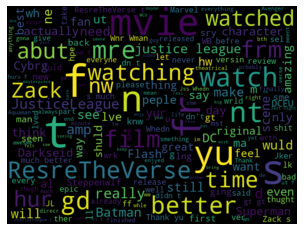

In [25]:
tweet_dict = ' '.join([twts for twts in df['tweet']])
wordCloud = WordCloud(width = 800, height=600, random_state=21, max_font_size=125).generate(tweet_dict)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [14]:
# Derive Postive, Neutral & Negative from Polarity scores

def Analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(Analysis)
df['Analysis']

1       Positive
4       Positive
5        Neutral
6       Positive
8        Neutral
          ...   
9992    Negative
9993     Neutral
9995     Neutral
9998    Positive
9999    Positive
Name: Analysis, Length: 6067, dtype: object

In [19]:
df.shape[0]

6067

In [15]:
# Plot Subjectivity Vs Polarity 

plt.figure(figsize=(10,8))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'darkcyan')
plt.title('Twitter Sentiment Analyis on Zack Synder - Justice League Movie')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid()
plt.show()

KeyError: 0

In [20]:
# % of Positive Tweets

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['tweet']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)


52.2

In [21]:
# % of Negative Tweets

ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['tweet']

round((ntweets.shape[0] / df.shape[0]) * 100, 1)

15.9

In [19]:
# % of Neutral Tweets

neutweets = df[df.Analysis == 'Neutral']
neutweets = neutweets['tweet']

round((neutweets.shape[0] / df.shape[0]) * 100, 1)

32.6

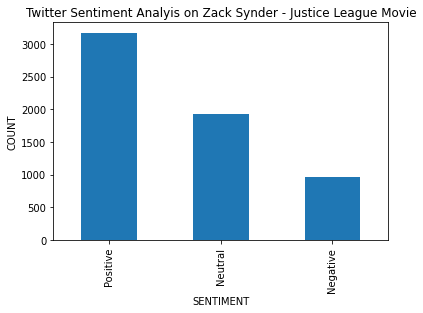

In [26]:
# Visualize the Sentiment

df['Analysis'].value_counts()

plt.title('Twitter Sentiment Analyis on Zack Synder - Justice League Movie')
plt.xlabel('SENTIMENT')
plt.ylabel('COUNT')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()


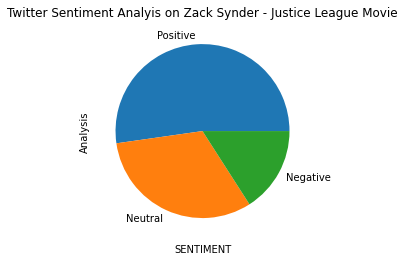

In [27]:

df['Analysis'].value_counts()

plt.title('Twitter Sentiment Analyis on Zack Synder - Justice League Movie')
plt.xlabel('SENTIMENT')
plt.ylabel('COUNT')
df['Analysis'].value_counts().plot(kind='pie')
plt.show()


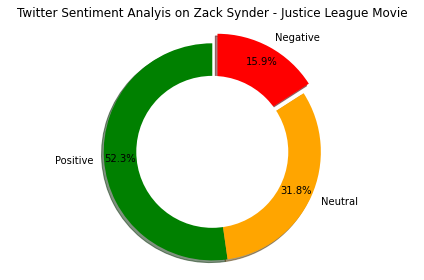

In [43]:
labels = 'Positive', 'Neutral', 'Negative'
sizes = [round((ptweets.shape[0] / df.shape[0]) * 100, 1), round((neutweets.shape[0] / df.shape[0]) * 100, 1), round((ntweets.shape[0] / df.shape[0]) * 100, 1)]
explode = (0, 0, 0.1)
colors = ("Green","Orange","Red")
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')
plt.title('Twitter Sentiment Analysis on Zack Synder - Justice League Movie')
plt.tight_layout()
plt.show()